[Source](https://www.dataquest.io/blog/pandas-python-tutorial/)

Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages. Pandas is one of those packages, and makes importing and analyzing data much easier. Pandas builds on packages like NumPy and matplotlib to give you a single, convenient, place to do most of your data analysis and visualization work.

In this introduction, we'll use Pandas to analyze data on video game reviews from IGN, a popular video game review site. The data was scraped by [Eric Grinstein](https://www.kaggle.com/egrinstein), and can be found [here](https://www.kaggle.com/egrinstein/20-years-of-games). As we analyze the video game reviews, we'll learn key Pandas concepts like indexing.

Do games like the Witcher 3 tend to get better reviews on the PS4 than the Xbox One? This dataset can help us find out.

# Importing Data with Pandas

The first step we'll take is to read the data in. The data is stored as a comma-separated values, or csv, file, where each row is separated by a new line, and each column by a comma (,). Here are the first few rows of the ign.csv file:

```
,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero Edition,/games/littlebigplanet-ps-vita-marvel-super-hero-edition/vita-20027059,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
```

As you can see above, each row in the data represents a single game that was reviewed by IGN. The columns contain information about that game:

* score_phrase — how IGN described the game in one word. This is linked to the score it received.
* title — the name of the game.
* url — the URL where you can see the full review.
* platform — the platform the game was reviewed on (PC, PS4, etc).
* score — the score for the game, from 1.0 to 10.0.
* genre — the genre of the game.
* editors_choice — N if the game wasn't an editor's choice, Y if it was. This is tied to score.
* release_year — the year the game was released.
* release_month — the month the game was released.
* release_day — the day the game was released.

There's also a leading column that contains row index values. We can safely ignore this column, but we'll dive into what index values are later on. In order to be able to work with the data in Python, we'll need to read the csv file into a Pandas DataFrame. A DataFrame is a way to represent and work with tabular data. Tabular data has rows and columns, just like our csv file.

In order to read in the data, we'll need to use the pandas.read_csv function. This function will take in a csv file and return a DataFrame. The below code will:

* Import the pandas library. We rename it to pd so it's faster to type out.
* Read ign.csv into a DataFrame, and assign the result to reviews.

In [1]:
# disable warnings for lecture
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

reviews = pd.read_csv("ign.csv")

Once we read in a DataFrame, Pandas gives us two methods that make it fast to print out the data. These functions are:

* ```pandas.DataFrame.head``` -- prints the first N rows of a DataFrame. By default 5.
* ```pandas.DataFrame.tail``` -- prints the last N rows of a DataFrame. By default 5.

We'll use the head method to see what's in reviews:

In [3]:
reviews.head(3)

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12


We can also access the ```pandas.DataFrame.shape``` property to see row many rows and columns are in reviews:

In [4]:
reviews.shape

(18625, 11)

As you can see, everything has been read in properly -- we have 18625 rows and 11 columns.

One of the big advantages of Pandas vs just using NumPy is that Pandas allows you to have columns with different data types. reviews has columns that store float values, like score, string values, like score_phrase, and integers, like release_year.

Now that we've read the data in properly, let's work on indexing reviews to get the rows and columns that we want.

## Indexing DataFrames with Pandas

Earlier, we used the head method to print the first 5 rows of reviews. We could accomplish the same thing using the ```pandas.DataFrame.iloc``` method. The ```iloc``` method allows us to retrieve rows and columns by position. In order to do that, we'll need to specify the positions of the rows that we want, and the positions of the columns that we want as well.

The below code will replicate reviews.head():

In [5]:
reviews.iloc[0:5,:]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


As you can see above, we specified that we wanted rows 0:5. This means that we wanted the rows from position 0 up to, but not including, position 5. The first row is considered to be in position 0. This gives us the rows at positions 0, 1, 2, 3, and 4.

If we leave off the first position value, like :5, it's assumed we mean 0. If we leave off the last position value, like 0:, it's assumed we mean the last row or column in the DataFrame.

We wanted all of the columns, so we specified just a colon (:), without any positions. This gave us the columns from 0 to the last column.

Here are some indexing examples, along with the results:

* ```reviews.iloc[:5,:]``` — the first 5 rows, and all of the columns for those rows.
* ```reviews.iloc[:,:]``` — the entire DataFrame.
* ```reviews.iloc[5:,5:]``` — rows from position 5 onwards, and columns from position 5 onwards.
* ```reviews.iloc[:,0]``` — the first column, and all of the rows for the column.
* ```reviews.iloc[9,:]``` — the 10th row, and all of the columns for that row.

Indexing by position is very similar to NumPy indexing.

Now that we know how to index by position, let's remove the first column, which doesn't have any useful information:

In [6]:
reviews = reviews.iloc[:,1:]
reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [7]:
reviews.shape

(18625, 10)

### Indexing Using Labels in Pandas
Now that we know how to retrieve rows and columns by position, it's worth looking into the other major way to work with DataFrames, which is to retrieve rows and columns by label.

A major advantage of Pandas over NumPy is that each of the columns and rows has a label. Working with column positions is possible, but it can be hard to keep track of which number corresponds to which column.

We can work with labels using the ```pandas.DataFrame.loc``` method, which allows us to index using labels instead of positions.

We can display the first five rows of reviews using the ```loc``` method like this:

In [8]:
reviews.loc[0:5,:]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11


The above doesn't actually look much different from ```reviews.iloc[0:5,:]```. This is because while row labels can take on any values, our row labels match the positions exactly. You can see the row labels on the very left of the table above (they're in bold). You can also see them by accessing the index property of a DataFrame. We'll display the row indexes for reviews:

In [9]:
reviews.index

RangeIndex(start=0, stop=18625, step=1)

In [10]:
# pull out the 1st twenty indexes
list(reviews.index)[:20]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Indexes don't always have to match up with positions, though. In the below code cell, we'll:

Get row 10 to row 20 of reviews, and assign the result to some_reviews.
Display the first 5 rows of some_reviews.

In [11]:
some_reviews = reviews.iloc[10:20,]
some_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7


As we mentioned earlier, column labels can make life much easier when you're working with data. We can specify column labels in the loc method to retrieve columns by label instead of by position.

In [12]:
reviews.loc[:5, "score"]

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
5    7.0
Name: score, dtype: float64

We can also specify more than one column at a time by passing in a list:

In [13]:
reviews.loc[:5, ["score", "release_year"]]

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
5,7.0,2012


In [14]:
reviews.loc[[0, 3], ["score", "release_year"]]

,score,release_year
0,9.0,2012
3,8.5,2012


## Pandas Series Objects

We can retrieve an individual column in Pandas a few different ways. So far, we've seen two types of syntax for this:

* ```reviews.iloc[:,1]``` — will retrieve the second column.
* ```reviews.loc[:,"score_phrase"]``` — will also retrieve the second column.

There's a third, even easier, way to retrieve a whole column. We can just specify the column name in square brackets, like with a dictionary:

In [15]:
reviews["score"].head()

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
Name: score, dtype: float64

We can also use lists of columns with this method:

In [16]:
x = reviews[["score", "release_year"]]
x.head()

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012


When we retrieve a single column, we're actually retrieving a Pandas ```Series``` object. A ```DataFrame``` stores **tabular data**, but a ```Series``` stores **a single column or row** of data.

We can verify that a single column is a ```Series```:

In [17]:
type(reviews["score"])

pandas.core.series.Series

We can create a ```Series``` manually to better understand how it works. To create a ```Series```, we pass a list or NumPy array into the ```Series``` object when we instantiate it:

In [18]:
s1 = pd.Series([1, 2])
s1

0    1
1    2
dtype: int64

A ```Series``` can contain any type of data, including mixed types. Here, we create a ```Series``` that contains string objects:

In [19]:
s2 = pd.Series(["Boris Yeltsin", "Mikhail Gorbachev"])
s2

0        Boris Yeltsin
1    Mikhail Gorbachev
dtype: object

# Creating A DataFrame in Pandas
We can create a ```DataFrame``` by passing multiple ```Series``` into the ```DataFrame``` class. Here, we pass in the two ```Series``` objects we just created, ```s1``` as the first row, and ```s2``` as the second row:

In [20]:
# create a dataframe from two series
x = pd.DataFrame()
x['rank'] = s1
x['name'] = s2
x

,rank,name
0,1,Boris Yeltsin
1,2,Mikhail Gorbachev


In [21]:
# create a datafrme from a dictionary
y = pd.DataFrame({
    'rank': s1,
    'name': s2
})
y

,rank,name
0,1,Boris Yeltsin
1,2,Mikhail Gorbachev


In [22]:
# create a dataframe from a list
pd.DataFrame([s1, s2])

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


We can also accomplish the same thing with a list of lists. Each inner list is treated as a row in the resulting DataFrame:

In [23]:
# create a dataframe from a list of lists
pd.DataFrame(
    [
        [1, "Boris Yeltsin"],
        [2, "Mikhail Gorbachev"]
    ]
)

,0,1
0,1,Boris Yeltsin
1,2,Mikhail Gorbachev


We can specify the column labels when we create a DataFrame:

In [24]:
# specify column labels
pd.DataFrame(
    [
        [1, "Boris Yeltsin"],
        [2, "Mikhail Gorbachev"]
    ],
    columns=["rank", "name"]
)

,rank,name
0,1,Boris Yeltsin
1,2,Mikhail Gorbachev


As well as the row labels (the index):

In [25]:
# specify the index labels
frame = pd.DataFrame(
    [
        [1,2],
        ["Boris Yeltsin", "Mikhail Gorbachev"]
    ],
    index=["rank", "name"],
    columns=["person1", "person2"]
)
frame

,person1,person2
rank,1,2
name,Boris Yeltsin,Mikhail Gorbachev


We're then able index the ```DataFrame``` using the labels:

In [26]:
frame.loc["rank":"name", "person1"]

rank                1
name    Boris Yeltsin
Name: person1, dtype: object

We can skip specifying the columns keyword argument if we pass a dictionary into the ```DataFrame``` constructor. This will automatically setup column names:

In [27]:
frame = pd.DataFrame(
    {
        "person1": [1, "Boris Yeltsin"],
        "person2": [2, "Mikhail Gorbachev"]
    }
)
frame

,person1,person2
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


## Pandas DataFrame Methods

As we mentioned earlier, each column in a ```DataFrame``` is a ```Series``` object:

In [28]:
type(reviews["title"])

pandas.core.series.Series

We can call most of the same methods on a ```Series``` object that we can on a ```DataFrame```, including head:

In [29]:
reviews["title"].head()

0                              LittleBigPlanet PS Vita
1    LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                 Splice: Tree of Life
3                                               NHL 13
4                                               NHL 13
Name: title, dtype: object

Pandas ```Series``` and ```DataFrame``` also have other methods that make calculations simpler. For example, we can use the ```pandas.Series.mean``` method to find the mean of a ```Series```:

In [30]:
reviews["score"].mean()

6.950459060402685

We can also call the similar ```pandas.DataFrame.mean``` method, which will find the mean of each numerical column in a ```DataFrame``` by default:

In [31]:
x = reviews.mean()
x

score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

We can modify the ```axis``` keyword argument to mean in order to compute the mean of each row or of each column. By default, ```axis``` is equal to 0, and will compute the mean of each **column**. We can also set it to 1 to compute the mean of each **row**. Note that this will only compute the mean of the numerical values in each row:

In [32]:
reviews.mean(axis=1).head()

0    510.500
1    510.500
2    510.375
3    510.125
4    510.125
dtype: float64

There are quite a few methods on ```Series``` and ```DataFrame``` that behave like ```mean```. Here are some handy ones:

* ```pandas.DataFrame.corr``` — finds the correlation between columns in a DataFrame.
* ```pandas.DataFrame.count``` — counts the number of non-null values in each DataFrame column.
* ```pandas.DataFrame.max``` — finds the highest value in each column.
* ```pandas.DataFrame.min``` — finds the lowest value in each column.
* ```pandas.DataFrame.median``` — finds the median of each column.
* ```pandas.DataFrame.std``` — finds the standard deviation of each column.

We can use the corr method to see if any columns correlation with score. For instance, this would tell us if games released more recently have been getting higher reviews (release_year), or if games released towards the end of the year score better (release_month):

In [33]:
reviews.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


As you can see above, none of our numeric columns correlates with score, meaning that release timing doesn't linearly relate to review score.

## DataFrame Math with Pandas
We can also perform math operations on ```Series``` or ```DataFrame``` objects. For example, we can divide every value in the score column by 2 to switch the scale from 0-10 to 0-5:

In [34]:
reviews["score"] / 2

0        4.50
1        4.50
2        4.25
3        4.25
4        4.25
         ... 
18620    3.80
18621    4.50
18622    2.90
18623    5.00
18624    5.00
Name: score, Length: 18625, dtype: float64

All the common mathematical operators that work in Python, like ```+```, ```-```, ```*```, ```/```, and ```^``` will work, and will apply to each element in a ```DataFrame``` or a ```Series```.

## Boolean Indexing in Pandas

As we saw above, the mean of all the values in the score column of reviews is around 7. What if we wanted to find all the games that got an above average score? We could start by doing a comparison. The comparison compares each value in a ```Series``` to a specified value, then generate a ```Series``` full of ```Boolean``` values indicating the status of the comparison. For example, we can see which of the rows have a score value higher than 7:

In [35]:
score_filter = reviews["score"] > 7
score_filter

0         True
1         True
2         True
3         True
4         True
         ...  
18620     True
18621     True
18622    False
18623     True
18624     True
Name: score, Length: 18625, dtype: bool

Once we have a ```Boolean``` ```Series```, we can use it to select only rows in a ```DataFrame``` where the ```Series``` contains the value ```True```. So, we could only select rows in reviews where score is greater than 7:

In [36]:
filtered_reviews = reviews[score_filter]
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


It's possible to use multiple conditions for filtering. Let's say we want to find games released for the Xbox One that have a score of more than 7. In the below code, we:

* Setup a filter with two conditions:
    * Check if score is greater than 7.
    * Check if platform equals Xbox One
* Apply the filter to reviews to get only the rows we want.
* Use the head method to print the first 5 rows of filtered_reviews.

In [37]:
# setup the boolean filtr
xbox_one_filter = (reviews["score"] > 7) & (reviews["platform"] == "Xbox One")

# select the data based on the filter
filtered_reviews = reviews[xbox_one_filter]

# display the first 5 results
filtered_reviews.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
17137,Amazing,Gone Home,/games/gone-home/xbox-one-20014361,Xbox One,9.5,Simulation,Y,2013,8,15
17197,Amazing,Rayman Legends,/games/rayman-legends/xbox-one-20008449,Xbox One,9.5,Platformer,Y,2013,8,26
17295,Amazing,LEGO Marvel Super Heroes,/games/lego-marvel-super-heroes/xbox-one-20000826,Xbox One,9.0,Action,Y,2013,10,22
17313,Great,Dead Rising 3,/games/dead-rising-3/xbox-one-124306,Xbox One,8.3,Action,N,2013,11,18
17317,Great,Killer Instinct,/games/killer-instinct-2013/xbox-one-20000538,Xbox One,8.4,Fighting,N,2013,11,18


When filtering with multiple conditions, it's important to put each condition in parentheses ```()```, and separate them with a single ampersand ```&```.

# Pandas Plotting

Now that we know how to filter, we can create plots to observe the review distribution for the Xbox One vs the review distribution for the PlayStation 4. This will help us figure out which console has better games. We can do this via a histogram, which will plot the frequencies for different score ranges. This will tell us which console has more highly reviewed games.

We can make a histogram for each console using the ```pandas.DataFrame.plot``` method. This method utilizes ```matplotlib```, the popular Python plotting library, under the hood to generate good-looking plots.

The plot method defaults to drawing a line graph. We'll need to pass in the keyword argument ```kind="hist"``` to draw a histogram instead.

In the below code, we:

* Call ```%matplotlib inline``` to set up plotting inside a Jupyter notebook.
* Filter reviews to only have data about the Xbox One.
* Plot the score column.

In [38]:
reviews["platform"].unique()

array(['PlayStation Vita', 'iPad', 'Xbox 360', 'PlayStation 3',
       'Macintosh', 'PC', 'iPhone', 'Nintendo DS', 'Nintendo 3DS',
       'Android', 'Wii', 'PlayStation 4', 'Wii U', 'Linux',
       'PlayStation Portable', 'PlayStation', 'Nintendo 64', 'Saturn',
       'Lynx', 'Game Boy', 'Game Boy Color', 'NeoGeo Pocket Color',
       'Game.Com', 'Dreamcast', 'Dreamcast VMU', 'WonderSwan', 'Arcade',
       'Nintendo 64DD', 'PlayStation 2', 'WonderSwan Color',
       'Game Boy Advance', 'Xbox', 'GameCube', 'DVD / HD Video Game',
       'Wireless', 'Pocket PC', 'N-Gage', 'NES', 'iPod', 'Genesis',
       'TurboGrafx-16', 'Super NES', 'NeoGeo', 'Master System',
       'Atari 5200', 'TurboGrafx-CD', 'Atari 2600', 'Sega 32X', 'Vectrex',
       'Commodore 64/128', 'Sega CD', 'Nintendo DSi', 'Windows Phone',
       'Web Games', 'Xbox One', 'Windows Surface', 'Ouya',
       'New Nintendo 3DS', 'SteamOS'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

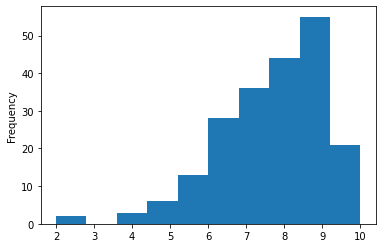

In [39]:
# enable display of chart inline
%matplotlib inline

# setup the filter
platform_filter = reviews["platform"] == "Xbox One"

# select and plot
reviews[platform_filter]["score"].plot(kind="hist")

We can also do the same for the PS4:

<AxesSubplot:ylabel='Frequency'>

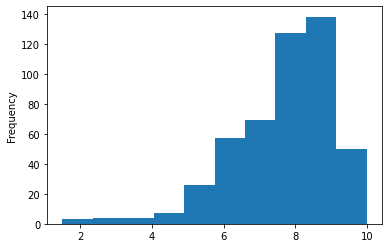

In [40]:
# setup the filter
mask = reviews["platform"].isin(["Xbox One", "PlayStation 4"])

# select and plot
reviews[mask]["score"].plot(kind="hist")

It appears from our histogram that the PlayStation 4 has many more highly rated games than the Xbox One.

<AxesSubplot:>

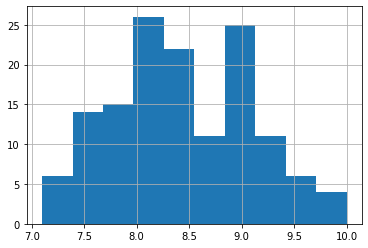

In [41]:
# plot all
filtered_reviews["score"].hist()